<a href="https://colab.research.google.com/github/Architg021/SUNRISE/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

1. Data Collection

In [ ]:
data_path = '/content/creditcard.csv'
data = pd.read_csv(data_path)

In [ ]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

Dataset Preview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26    

2. Data Exploration and Cleaning

In [ ]:
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
#0 indicates normal transactions and 1 indicates fraudelent transactions
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


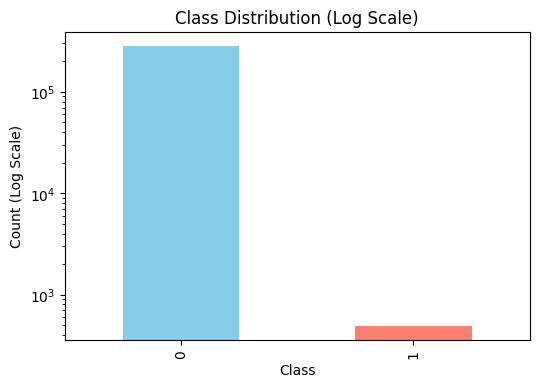

In [ ]:
# Enhanced class distribution visualization
plt.figure(figsize=(6, 4))
class_counts = data['Class'].value_counts()
class_counts.plot(kind='bar', color=['skyblue', 'salmon'], logy=True)  # Log scale for better visibility
plt.title('Class Distribution (Log Scale)')
plt.xlabel('Class')
plt.ylabel('Count (Log Scale)')
plt.show()

In [ ]:
#Separate features and target after handling missing values
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print("Number of missing values in y (target variable):", y.isnull().sum())


Number of missing values in y (target variable): 0


3. Feature Engineering: Analyze feature importance (optional for tree-based models)

In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


4. Machine Learning Models: Random Forest Classifier

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = clf.predict(X_test)

5. Evaluation

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[56859     5]
 [   18    80]]


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



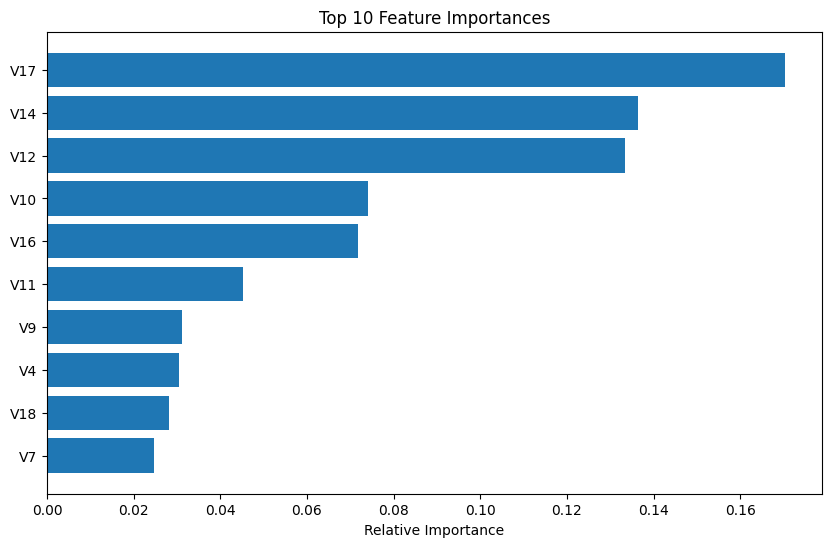

In [ ]:
# Visualize feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


6. Insights and Recommendations

In [ ]:
# Analyze potential anomalies
print("\nPotential Anomalies:")
anomalies = data[data['Class'] == 1]
print(anomalies.describe())


Potential Anomalies:
                Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9  ...  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  ...   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123  ...   
std      5.372468    1.858124    7.206773    6.797831    2.500896  ...   
min    -22.105532   -6.406267  -4

In [ ]:
# Real-time Monitoring Simulation (Example)
def detect_fraud(transaction):
    transaction_scaled = scaler.transform([transaction])
    prediction = clf.predict(transaction_scaled)
    return "Fraud" if prediction == 1 else "Normal"

In [ ]:
# Simulate a transaction
sample_transaction = X.iloc[0].values
print("\nSample Transaction Prediction:", detect_fraud(sample_transaction))



Sample Transaction Prediction: Normal


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
